In [35]:
#!pip install geopandas


In [36]:
import pandas as pd
import pandas as pandas
import geopandas as gpd


### **Electricity Generation data**

In [37]:
africa_df = pd.read_excel('../data/electricity_generation_data/african_countries.xlsx')
africa_df.head()

,Countries,Region
0,Algeria,Northern Africa
1,Egypt,Northern Africa
2,Libya,Northern Africa
3,Morocco,Northern Africa
4,Sudan,Northern Africa


In [38]:
generation_df = pd.read_csv('../data/electricity_generation_data/electricity-generation.csv')
generation_df.head()

,Entity,Code,Year,Electricity generation - TWh
0,ASEAN (Ember),NaN,2000,378.61
1,ASEAN (Ember),NaN,2001,404.85
2,ASEAN (Ember),NaN,2002,433.19
3,ASEAN (Ember),NaN,2003,458.24
4,ASEAN (Ember),NaN,2004,496.56


In [39]:
demand_df = pd.read_csv('../data/electricity_generation_data/electricity-demand.csv')
demand_df.head()

,Entity,Code,Year,Electricity demand - TWh
0,ASEAN (Ember),NaN,2000,378.61
1,ASEAN (Ember),NaN,2001,404.85
2,ASEAN (Ember),NaN,2002,433.19
3,ASEAN (Ember),NaN,2003,458.24
4,ASEAN (Ember),NaN,2004,496.56


In [40]:
pop_density = pd.read_csv('../data/pop_density_data/Kenya_pop_data.csv')
pop_density.head()

,X,Y,Z
0,35.244583,5.462084,52.668011
1,35.252917,5.462084,42.566807
2,35.261250,5.462084,39.304050
3,35.269583,5.462084,41.851067
4,35.277917,5.462084,38.238289


### **Income Level Data**

**GEOPACKAGE FILE**

In [41]:
import sqlite3

# Connect to the GeoPackage file
file_path = r'C:\Users\user\Documents\PHASE_5- Capstone Project\phase-5-project\Energy-Access-and-Electrification-planning\data\income_level_data\GSAP_AM24_2021.gpkg'
conn = sqlite3.connect(file_path)
cursor = conn.cursor()

# Re-check the list of tables to confirm
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()
print("Tables in GeoPackage:", tables)

# Try to get information from gpkg_contents again
try:
    cursor.execute("SELECT * FROM gpkg_contents;")
    content_info = cursor.fetchall()
    print("Content Information from gpkg_contents:", content_info)
except sqlite3.OperationalError as e:
    print("Error accessing gpkg_contents:", e)

# Check gpkg_geometry_columns for any geometry-related information
try:
    cursor.execute("SELECT * FROM gpkg_geometry_columns;")
    geometry_info = cursor.fetchall()
    print("Geometry Information from gpkg_geometry_columns:", geometry_info)
except sqlite3.OperationalError as e:
    print("Error accessing gpkg_geometry_columns:", e)

# Close the connection
conn.close()


Tables in GeoPackage: [('gpkg_spatial_ref_sys',), ('gpkg_contents',), ('gpkg_ogr_contents',), ('gpkg_geometry_columns',), ('gpkg_tile_matrix_set',), ('gpkg_tile_matrix',), ('sqlite_sequence',), ('gpkg_extensions',)]
Content Information from gpkg_contents: []
Geometry Information from gpkg_geometry_columns: []


### **Accessing Tile and Matrix Data**

In [42]:
conn = sqlite3.connect(file_path)
cursor = conn.cursor()

# Inspect 'gkpg_tile_matrix_set'
cursor.execute("SELECT * FROM gpkg_tile_matrix_set;")
tile_matrix_set_info = cursor.fetchall()
print("Tile Matrix Set Information:", tile_matrix_set_info)

# Inspect `gpkg_tile_matrix`
cursor.execute("SELECT * FROM gpkg_tile_matrix;")
tile_matrix_info = cursor.fetchall()
print("Tile Matrix Information:", tile_matrix_info)

# Close the connection
conn.close()

Tile Matrix Set Information: []
Tile Matrix Information: []


In [43]:
import sqlite3

# Connect to the GeoPackage file
file_path = r'C:\Users\user\Documents\PHASE_5- Capstone Project\phase-5-project\Energy-Access-and-Electrification-planning\data\income_level_data\GSAP_AM24_2021.gpkg'
conn = sqlite3.connect(file_path)
cursor = conn.cursor()

# 1. Check gpkg_spatial_ref_sys for spatial reference system information
cursor.execute("SELECT * FROM gpkg_spatial_ref_sys;")
spatial_ref_sys_info = cursor.fetchall()
print("Spatial Reference System Information from gpkg_spatial_ref_sys:", spatial_ref_sys_info)

# 2. Check gpkg_ogr_contents for any contents specific to OGR data
cursor.execute("SELECT * FROM gpkg_ogr_contents;")
ogr_contents_info = cursor.fetchall()
print("OGR Contents Information from gpkg_ogr_contents:", ogr_contents_info)

# 3. Check gpkg_tile_matrix_set for tile matrix sets, if any
cursor.execute("SELECT * FROM gpkg_tile_matrix_set;")
tile_matrix_set_info = cursor.fetchall()
print("Tile Matrix Set Information from gpkg_tile_matrix_set:", tile_matrix_set_info)

# 4. Check gpkg_tile_matrix for details about tile matrices
cursor.execute("SELECT * FROM gpkg_tile_matrix;")
tile_matrix_info = cursor.fetchall()
print("Tile Matrix Information from gpkg_tile_matrix:", tile_matrix_info)

# 5. Check gpkg_extensions for any additional extension information
cursor.execute("SELECT * FROM gpkg_extensions;")
extensions_info = cursor.fetchall()
print("Extensions Information from gpkg_extensions:", extensions_info)

# 6. (Optional) Check sqlite_sequence to see if there's any sequence or primary key information
cursor.execute("SELECT * FROM sqlite_sequence;")
sequence_info = cursor.fetchall()
print("Sequence Information from sqlite_sequence:", sequence_info)

# Close the connection
conn.close()


Spatial Reference System Information from gpkg_spatial_ref_sys: [('Undefined Cartesian SRS', -1, 'NONE', -1, 'undefined', 'undefined Cartesian coordinate reference system'), ('Undefined geographic SRS', 0, 'NONE', 0, 'undefined', 'undefined geographic coordinate reference system'), ('WGS 84 geodetic', 4326, 'EPSG', 4326, 'GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]', 'longitude/latitude coordinates in decimal degrees on the WGS 84 spheroid')]
OGR Contents Information from gpkg_ogr_contents: []
Tile Matrix Set Information from gpkg_tile_matrix_set: []
Tile Matrix Information from gpkg_tile_matrix: []
Extensions Information from gpkg_extensions: []
Sequence Information from sqlite_sequence: []


**DBF FILE**

In [44]:
#!pip install dbfread


In [45]:
from dbfread import DBF

dbf_file_path = r'C:\Users\user\Documents\PHASE_5- Capstone Project\phase-5-project\Energy-Access-and-Electrification-planning\data\income_level_data\GSAP_AM24_2021.dbf'

#Open and Read the file
table = DBF(dbf_file_path, load=True)

#Print all records

for record in table:
    print(record)
    
#print field names to understand the table format

print("\nField names:", table.field_names)

OrderedDict([('code', 'ABW'), ('geo_year', None), ('geo_source', ''), ('geo_level', ''), ('geo_idvar', ''), ('geo_id', ''), ('geo_nvar', ''), ('geo_name', 'Aruba (Neth.)'), ('geo_code', 'ABW_2020_WB0')])
OrderedDict([('code', 'AFG'), ('geo_year', None), ('geo_source', ''), ('geo_level', ''), ('geo_idvar', ''), ('geo_id', ''), ('geo_nvar', ''), ('geo_name', 'Afghanistan'), ('geo_code', 'AFG_2020_WB0')])
OrderedDict([('code', 'AGO'), ('geo_year', 2015.0), ('geo_source', 'GAUL'), ('geo_level', '1'), ('geo_idvar', 'ADM1_CODE'), ('geo_id', '398'), ('geo_nvar', 'ADM1_NAME'), ('geo_name', 'Bengo'), ('geo_code', 'AGO_2015_GAUL1_398')])
OrderedDict([('code', 'AGO'), ('geo_year', 2015.0), ('geo_source', 'GAUL'), ('geo_level', '1'), ('geo_idvar', 'ADM1_CODE'), ('geo_id', '399'), ('geo_nvar', 'ADM1_NAME'), ('geo_name', 'Benguela'), ('geo_code', 'AGO_2015_GAUL1_399')])
OrderedDict([('code', 'AGO'), ('geo_year', 2015.0), ('geo_source', 'GAUL'), ('geo_level', '1'), ('geo_idvar', 'ADM1_CODE'), ('geo_i

In [46]:
# Convert the dbf file into a dataframe

import pandas as pd

dbf_file = pd.DataFrame(iter(table))

dbf_file.head()

,code,geo_year,geo_source,geo_level,geo_idvar,geo_id,geo_nvar,geo_name,geo_code
0,ABW,NaN,,,,,,Aruba (Neth.),ABW_2020_WB0
1,AFG,NaN,,,,,,Afghanistan,AFG_2020_WB0
2,AGO,2015.0,GAUL,1,ADM1_CODE,398,ADM1_NAME,Bengo,AGO_2015_GAUL1_398
3,AGO,2015.0,GAUL,1,ADM1_CODE,399,ADM1_NAME,Benguela,AGO_2015_GAUL1_399
4,AGO,2015.0,GAUL,1,ADM1_CODE,400,ADM1_NAME,Bie,AGO_2015_GAUL1_400


In [47]:
dbf_kenya = dbf_file[(dbf_file['code'] == 'KEN') | (dbf_file['geo_name'].str.contains('Kenya', case=False, na=False))]
print(dbf_kenya.shape)
print(dbf_kenya.info())
dbf_kenya.head()

(47, 9)
<class 'pandas.core.frame.DataFrame'>
Index: 47 entries, 679 to 725
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   code        47 non-null     object 
 1   geo_year    47 non-null     float64
 2   geo_source  47 non-null     object 
 3   geo_level   47 non-null     object 
 4   geo_idvar   47 non-null     object 
 5   geo_id      47 non-null     object 
 6   geo_nvar    47 non-null     object 
 7   geo_name    47 non-null     object 
 8   geo_code    47 non-null     object 
dtypes: float64(1), object(8)
memory usage: 3.7+ KB
None


,code,geo_year,geo_source,geo_level,geo_idvar,geo_id,geo_nvar,geo_name,geo_code
679,KEN,2022.0,GADM,1,GID_1,KEN.1_1,NAME_1,Baringo,KEN_2022_GADM1_KEN.1_1
680,KEN,2022.0,GADM,1,GID_1,KEN.2_1,NAME_1,Bomet,KEN_2022_GADM1_KEN.2_1
681,KEN,2022.0,GADM,1,GID_1,KEN.3_1,NAME_1,Bungoma,KEN_2022_GADM1_KEN.3_1
682,KEN,2022.0,GADM,1,GID_1,KEN.4_1,NAME_1,Busia,KEN_2022_GADM1_KEN.4_1
683,KEN,2022.0,GADM,1,GID_1,KEN.5_1,NAME_1,Elgeyo-Marakwet,KEN_2022_GADM1_KEN.5_1


**PRJ file**

In [48]:
with open(r'C:\Users\user\Documents\PHASE_5- Capstone Project\phase-5-project\Energy-Access-and-Electrification-planning\data\income_level_data\GSAP_AM24_2021.prj', 'r') as file: 
    prj_content = file.read() 
    
print(prj_content)

GEOGCS["GCS_WGS_1984",DATUM["D_WGS_1984",SPHEROID["WGS_1984",6378137.0,298.257223563]],PRIMEM["Greenwich",0.0],UNIT["Degree",0.0174532925199433]]


In [49]:
#!pip install pyproj


In [50]:
from pyproj import CRS 

#Create a CRS object from the PRJ Content

crs = CRS.from_wkt(prj_content)
print('Coordinate Reference System:\n', crs)

Coordinate Reference System:
 GEOGCS["GCS_WGS_1984",DATUM["D_WGS_1984",SPHEROID["WGS_1984",6378137.0,298.257223563]],PRIMEM["Greenwich",0.0],UNIT["Degree",0.0174532925199433]]


In [51]:
# Extract specific Details
# Step 1:  Extract the Datum  
datum = crs.datum.name if crs.datum else 'No datum available'

# Step 2: Extract the spheroid details 
spheroid = crs.ellipsoid.name if crs.ellipsoid else 'No spheroid available'
semi_major_axis = crs.ellipsoid.semi_major_metre if crs.ellipsoid else 'No semi-major axis available'
inverse_flattening = crs.ellipsoid.inverse_flattening if crs.ellipsoid else 'No inverse flattening available'

# Step 3: Extract the Prime Meridian details
prime_meridian = crs.prime_meridian.name if crs.prime_meridian else 'No prime meridian available'
prime_meridian_longitude = crs.prime_meridian.longitude if crs.prime_meridian else 'No prime meridian longitude available'

# Step 4: Extract the unit of measurement
unit_name = crs.axis_info[0].unit_name if crs.axis_info else 'No unit available'
unit_conversion_factor = crs.axis_info[0].unit_conversion_factor if crs.axis_info else 'No conversion factor available'

# Print the extracted details

print("Coordinate Reference System Details:")
print("Datum:", datum)
print("Spheroid:", spheroid)
print("Semi-Major Axis (meters):", semi_major_axis)
print("Inverse Flattening:", inverse_flattening)
print("Prime Meridian:", prime_meridian)
print("Prime Meridian Longitude:", prime_meridian_longitude)
print("Unit of Measurement:", unit_name)
print("Unit Conversion Factor:", unit_conversion_factor)


Coordinate Reference System Details:
Datum: World Geodetic System 1984
Spheroid: WGS 84
Semi-Major Axis (meters): 6378137.0
Inverse Flattening: 298.257223563
Prime Meridian: Greenwich
Prime Meridian Longitude: 0.0
Unit of Measurement: Degree
Unit Conversion Factor: 0.017453292519943295


**SHP and SHX files**

In [52]:
#!pip install geopandas pyshp


In [53]:
shp_path = r'C:\Users\user\Documents\PHASE_5- Capstone Project\phase-5-project\Energy-Access-and-Electrification-planning\data\income_level_data\GSAP_AM24_2021.shp'

# Read the shapefile
shp_file = gpd.read_file(shp_path)

# Display the contents of the .shp file

print("\nShapefile CRS:", shp_file.crs)  # Check CRS to ensure alignment
print("\nColumns in Shapefile:", shp_file.columns) 
shp_file.head()

c:\Users\user\anaconda3\Lib\site-packages\pyogrio\raw.py:198: RuntimeWarning: C:\Users\user\Documents\PHASE_5- Capstone Project\phase-5-project\Energy-Access-and-Electrification-planning\data\income_level_data\GSAP_AM24_2021.shp contains polygon(s) with rings with invalid winding order. Autocorrecting them, but that shapefile should be corrected using ogr2ogr for example.
  return ogr_read(



Shapefile CRS: EPSG:4326

Columns in Shapefile: Index(['code', 'geo_year', 'geo_source', 'geo_level', 'geo_idvar', 'geo_id',
       'geo_nvar', 'geo_name', 'geo_code', 'geometry'],
      dtype='object')


,code,geo_year,geo_source,geo_level,geo_idvar,geo_id,geo_nvar,geo_name,geo_code,geometry
0,ABW,NaN,None,None,None,None,None,Aruba (Neth.),ABW_2020_WB0,"POLYGON ((-69.99694 12.57758, -69.93639 12.531..."
1,AFG,NaN,None,None,None,None,None,Afghanistan,AFG_2020_WB0,"POLYGON ((74.54235 37.02167, 74.54742 37.01567..."
2,AGO,2015.0,GAUL,1,ADM1_CODE,398,ADM1_NAME,Bengo,AGO_2015_GAUL1_398,"POLYGON ((13.14401 -9.33313, 13.14405 -9.33316..."
3,AGO,2015.0,GAUL,1,ADM1_CODE,399,ADM1_NAME,Benguela,AGO_2015_GAUL1_399,"POLYGON ((13.79886 -11.77102, 13.79883 -11.771..."
4,AGO,2015.0,GAUL,1,ADM1_CODE,400,ADM1_NAME,Bie,AGO_2015_GAUL1_400,"POLYGON ((16.79741 -10.77021, 16.80907 -10.772..."


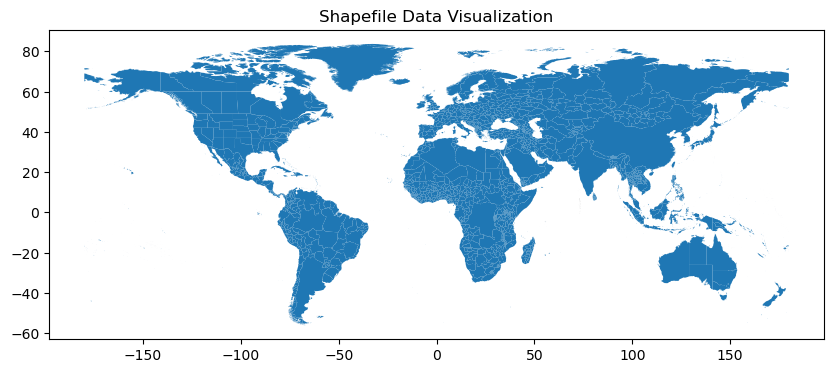

In [54]:
import matplotlib.pyplot as plt

# Plot the spatial data to visualize its distribution
shp_file.plot(figsize=(10, 10))
plt.title("Shapefile Data Visualization")
plt.show()


**Filter our data**

In [55]:
shp_kenya = shp_file[(shp_file['code'] == 'KEN') | (shp_file['geo_name'].str.contains('Kenya', case=False, na=False))]
print(shp_kenya.shape)
print(shp_kenya.info())
shp_kenya.head()


(47, 10)
<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 47 entries, 679 to 725
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   code        47 non-null     object  
 1   geo_year    47 non-null     float64 
 2   geo_source  47 non-null     object  
 3   geo_level   47 non-null     object  
 4   geo_idvar   47 non-null     object  
 5   geo_id      47 non-null     object  
 6   geo_nvar    47 non-null     object  
 7   geo_name    47 non-null     object  
 8   geo_code    47 non-null     object  
 9   geometry    47 non-null     geometry
dtypes: float64(1), geometry(1), object(8)
memory usage: 4.0+ KB
None


,code,geo_year,geo_source,geo_level,geo_idvar,geo_id,geo_nvar,geo_name,geo_code,geometry
679,KEN,2022.0,GADM,1,GID_1,KEN.1_1,NAME_1,Baringo,KEN_2022_GADM1_KEN.1_1,"MULTIPOLYGON (((35.7388 -0.19544, 35.72428 -0...."
680,KEN,2022.0,GADM,1,GID_1,KEN.2_1,NAME_1,Bomet,KEN_2022_GADM1_KEN.2_1,"POLYGON ((35.26033 -1.01608, 35.26021 -1.01621..."
681,KEN,2022.0,GADM,1,GID_1,KEN.3_1,NAME_1,Bungoma,KEN_2022_GADM1_KEN.3_1,"POLYGON ((34.91305 0.85131, 34.91327 0.85148, ..."
682,KEN,2022.0,GADM,1,GID_1,KEN.4_1,NAME_1,Busia,KEN_2022_GADM1_KEN.4_1,"POLYGON ((34.02698 -0.01568, 34.02082 -0.02018..."
683,KEN,2022.0,GADM,1,GID_1,KEN.5_1,NAME_1,Elgeyo-Marakwet,KEN_2022_GADM1_KEN.5_1,"MULTIPOLYGON (((35.53068 0.22495, 35.53475 0.2..."


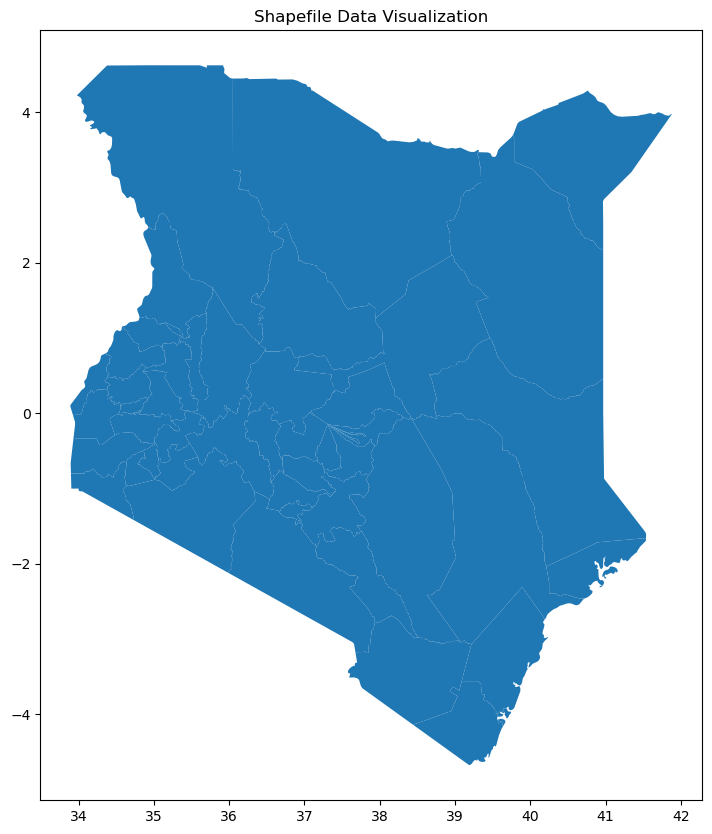

In [56]:
import matplotlib.pyplot as plt

# Plot the spatial data to visualize its distribution
shp_kenya.plot(figsize=(10, 10))
plt.title("Shapefile Data Visualization")
plt.show()


This visualization  helps us understand the spatial distribution and layout of Kenya's regions, providing insights into where to focus electrification efforts.

**SHX file**

In [57]:
import shapefile

shx_path = r'C:\Users\user\Documents\PHASE_5- Capstone Project\phase-5-project\Energy-Access-and-Electrification-Planning\data\income_level_data\GSAP_AM24_2021.shx'

with shapefile.Reader(shx_path) as shx_file: 
     print("Shape Type:", shx_file.shapeType)  # View shape type 
     print("Number of Features:", len(shx_file))

Shape Type: 5
Number of Features: 1835


In [58]:
dbf_file.head()

,code,geo_year,geo_source,geo_level,geo_idvar,geo_id,geo_nvar,geo_name,geo_code
0,ABW,NaN,,,,,,Aruba (Neth.),ABW_2020_WB0
1,AFG,NaN,,,,,,Afghanistan,AFG_2020_WB0
2,AGO,2015.0,GAUL,1,ADM1_CODE,398,ADM1_NAME,Bengo,AGO_2015_GAUL1_398
3,AGO,2015.0,GAUL,1,ADM1_CODE,399,ADM1_NAME,Benguela,AGO_2015_GAUL1_399
4,AGO,2015.0,GAUL,1,ADM1_CODE,400,ADM1_NAME,Bie,AGO_2015_GAUL1_400


In [59]:
shp_file.head()

,code,geo_year,geo_source,geo_level,geo_idvar,geo_id,geo_nvar,geo_name,geo_code,geometry
0,ABW,NaN,None,None,None,None,None,Aruba (Neth.),ABW_2020_WB0,"POLYGON ((-69.99694 12.57758, -69.93639 12.531..."
1,AFG,NaN,None,None,None,None,None,Afghanistan,AFG_2020_WB0,"POLYGON ((74.54235 37.02167, 74.54742 37.01567..."
2,AGO,2015.0,GAUL,1,ADM1_CODE,398,ADM1_NAME,Bengo,AGO_2015_GAUL1_398,"POLYGON ((13.14401 -9.33313, 13.14405 -9.33316..."
3,AGO,2015.0,GAUL,1,ADM1_CODE,399,ADM1_NAME,Benguela,AGO_2015_GAUL1_399,"POLYGON ((13.79886 -11.77102, 13.79883 -11.771..."
4,AGO,2015.0,GAUL,1,ADM1_CODE,400,ADM1_NAME,Bie,AGO_2015_GAUL1_400,"POLYGON ((16.79741 -10.77021, 16.80907 -10.772..."


In [61]:
kenya_income_level = pd.merge(shp_kenya,dbf_kenya, on = 'code', how = 'right')

print(kenya_income_level.shape)
kenya_income_level.head(10)

(2209, 18)


,code,geo_year_x,geo_source_x,geo_level_x,geo_idvar_x,geo_id_x,geo_nvar_x,geo_name_x,geo_code_x,geometry,geo_year_y,geo_source_y,geo_level_y,geo_idvar_y,geo_id_y,geo_nvar_y,geo_name_y,geo_code_y
0,KEN,2022.0,GADM,1,GID_1,KEN.1_1,NAME_1,Baringo,KEN_2022_GADM1_KEN.1_1,"MULTIPOLYGON (((35.7388 -0.19544, 35.72428 -0....",2022.0,GADM,1,GID_1,KEN.1_1,NAME_1,Baringo,KEN_2022_GADM1_KEN.1_1
1,KEN,2022.0,GADM,1,GID_1,KEN.2_1,NAME_1,Bomet,KEN_2022_GADM1_KEN.2_1,"POLYGON ((35.26033 -1.01608, 35.26021 -1.01621...",2022.0,GADM,1,GID_1,KEN.1_1,NAME_1,Baringo,KEN_2022_GADM1_KEN.1_1
2,KEN,2022.0,GADM,1,GID_1,KEN.3_1,NAME_1,Bungoma,KEN_2022_GADM1_KEN.3_1,"POLYGON ((34.91305 0.85131, 34.91327 0.85148, ...",2022.0,GADM,1,GID_1,KEN.1_1,NAME_1,Baringo,KEN_2022_GADM1_KEN.1_1
3,KEN,2022.0,GADM,1,GID_1,KEN.4_1,NAME_1,Busia,KEN_2022_GADM1_KEN.4_1,"POLYGON ((34.02698 -0.01568, 34.02082 -0.02018...",2022.0,GADM,1,GID_1,KEN.1_1,NAME_1,Baringo,KEN_2022_GADM1_KEN.1_1
4,KEN,2022.0,GADM,1,GID_1,KEN.5_1,NAME_1,Elgeyo-Marakwet,KEN_2022_GADM1_KEN.5_1,"MULTIPOLYGON (((35.53068 0.22495, 35.53475 0.2...",2022.0,GADM,1,GID_1,KEN.1_1,NAME_1,Baringo,KEN_2022_GADM1_KEN.1_1
5,KEN,2022.0,GADM,1,GID_1,KEN.6_1,NAME_1,Embu,KEN_2022_GADM1_KEN.6_1,"POLYGON ((37.67124 -0.83086, 37.67097 -0.8317,...",2022.0,GADM,1,GID_1,KEN.1_1,NAME_1,Baringo,KEN_2022_GADM1_KEN.1_1
6,KEN,2022.0,GADM,1,GID_1,KEN.7_1,NAME_1,Garissa,KEN_2022_GADM1_KEN.7_1,"POLYGON ((41.52317 -1.66136, 41.51615 -1.66166...",2022.0,GADM,1,GID_1,KEN.1_1,NAME_1,Baringo,KEN_2022_GADM1_KEN.1_1
7,KEN,2022.0,GADM,1,GID_1,KEN.8_1,NAME_1,Homa Bay,KEN_2022_GADM1_KEN.8_1,"POLYGON ((34.3721 -0.84214, 34.37218 -0.84227,...",2022.0,GADM,1,GID_1,KEN.1_1,NAME_1,Baringo,KEN_2022_GADM1_KEN.1_1
8,KEN,2022.0,GADM,1,GID_1,KEN.9_1,NAME_1,Isiolo,KEN_2022_GADM1_KEN.9_1,"POLYGON ((37.57217 0.32877, 37.57185 0.32878, ...",2022.0,GADM,1,GID_1,KEN.1_1,NAME_1,Baringo,KEN_2022_GADM1_KEN.1_1
9,KEN,2022.0,GADM,1,GID_1,KEN.10_1,NAME_1,Kajiado,KEN_2022_GADM1_KEN.10_1,"POLYGON ((35.99429 -2.10432, 35.99574 -2.10263...",2022.0,GADM,1,GID_1,KEN.1_1,NAME_1,Baringo,KEN_2022_GADM1_KEN.1_1


In [63]:

# Create an empty list to store the results
rows = []

# Iterate through each geometry and extract latitude and longitude
for index, row in kenya_income_level.iterrows():
    # Extract the geometry
    geom = row['geometry']

    # Handle MULTIPOLYGON or POLYGON types
    if geom.geom_type == 'MultiPolygon':
        for polygon in geom.geoms:  # Use geom.geoms to access individual polygons
            for coord in polygon.exterior.coords:
                rows.append({
                    'County': row['geo_name_x'],
                    'Latitude': coord[1],
                    'Longitude': coord[0]
                })
    elif geom.geom_type == 'Polygon':
        for coord in geom.exterior.coords:
            rows.append({
                'Latitude': coord[1],
                'Longitude': coord[0],
                'County': row['geo_name_x']
            })

kenya_income_level = pd.DataFrame(rows)
print(kenya_income_level.shape)
kenya_income_level

(12920300, 3)


,County,Latitude,Longitude
0,Baringo,-0.195439,35.738800
1,Baringo,-0.198901,35.724277
2,Baringo,-0.195616,35.723232
3,Baringo,-0.195289,35.723129
4,Baringo,-0.194905,35.723007
...,...,...,...
12920295,West Pokot,1.190623,35.422623
12920296,West Pokot,1.189342,35.422203
12920297,West Pokot,1.188469,35.422005
12920298,West Pokot,1.187765,35.421890


### **Grid Infrastructure**

### **Population data**

In [ ]:
import glob
import os

# Define the path to your CSV files
path = r'C:\Users\user\Documents\PHASE_5- Capstone Project\Phase-5-final-project\Energy-Access-and-Electrification-planning-in-Kenya\data\pop_density_data\pop_density_data'
pop_files = glob.glob(path + "/*.csv")

# Initialize a list to hold each DataFrame
pop_dfs = []

# Loop over each file to process it
for file in pop_files:
    year = os.path.basename(file).split('.')[0]
    pop_df = pd.read_csv(file)
    pop_df = pop_df.rename(columns={'Z': year, 'X':'Latitude', 'Y':'Longitude'})

    # Append the DataFrame to the list
    pop_dfs.append(pop_df)

# Merge all DataFrames on 'X' and 'Y' columns
pop_density_df = pop_dfs[0]
for pop_df in pop_dfs[1:]:
    pop_density_df = pop_density_df.merge(pop_df, on=['Latitude', 'Longitude'], how='outer')

pop_density_df

,Latitude,Longitude,2000,2001,2002,2003,2004,2005,2006,2007,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,35.244583,5.462084,1.416720,1.396852,1.624173,1.924415,2.429911,2.503574,3.391726,3.823526,...,7.716132,10.052105,11.457187,17.609232,18.419613,21.129835,26.949865,35.308475,39.717140,52.668011
1,35.252917,5.462084,1.413419,1.372664,1.583961,1.867518,2.361063,2.378553,3.223956,3.587913,...,7.106965,8.990801,10.381531,15.599761,15.981864,17.861954,23.140518,29.548529,32.403442,42.566807
2,35.261250,5.462084,1.418887,1.330445,1.540141,1.809350,2.250990,2.280811,3.042585,3.314642,...,6.575239,8.322875,9.466146,14.218251,14.787646,16.177166,21.212101,26.670294,29.277493,39.304050
3,35.269583,5.462084,1.457395,1.385305,1.572818,1.860333,2.281828,2.322971,3.142808,3.381774,...,6.775673,8.556246,9.631298,14.553508,15.171118,16.479475,22.152906,27.807093,30.655039,41.851067
4,35.277917,5.462084,1.512301,1.383120,1.565848,1.837749,2.219377,2.283923,3.029301,3.247593,...,6.441066,7.914247,9.031144,13.881150,14.152464,15.410886,20.551128,25.901073,28.307270,38.238289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
680380,39.402917,-4.704583,126.856934,114.480789,92.233864,51.968880,38.705093,36.720055,32.964993,33.610413,...,41.805164,38.985413,81.165375,39.789425,75.514580,152.778000,154.110641,143.955246,149.165466,166.426895
680381,39.411250,-4.704583,172.707367,150.494247,120.754379,74.849098,54.277927,52.671711,47.649155,47.568836,...,60.505344,56.823631,107.771729,59.105076,106.717369,199.424561,185.219086,184.364685,194.443283,205.901260
680382,39.369583,-4.712916,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
680383,39.377917,-4.712916,67.794678,17.083441,15.369174,15.428894,11.420929,13.993786,11.441626,10.612007,...,12.901483,13.024007,16.545351,13.038383,17.950626,173.214050,202.145950,170.369278,181.272644,208.989548


In [ ]:
pop_density_df = pop_density_df.fillna(pop_density_df.mode().iloc[0])
pop_density_df.isna().sum()

Latitude     0
Longitude    0
2000         0
2001         0
2002         0
2003         0
2004         0
2005         0
2006         0
2007         0
2008         0
2009         0
2010         0
2011         0
2012         0
2013         0
2014         0
2015         0
2016         0
2017         0
2018         0
2019         0
2020         0
dtype: int64

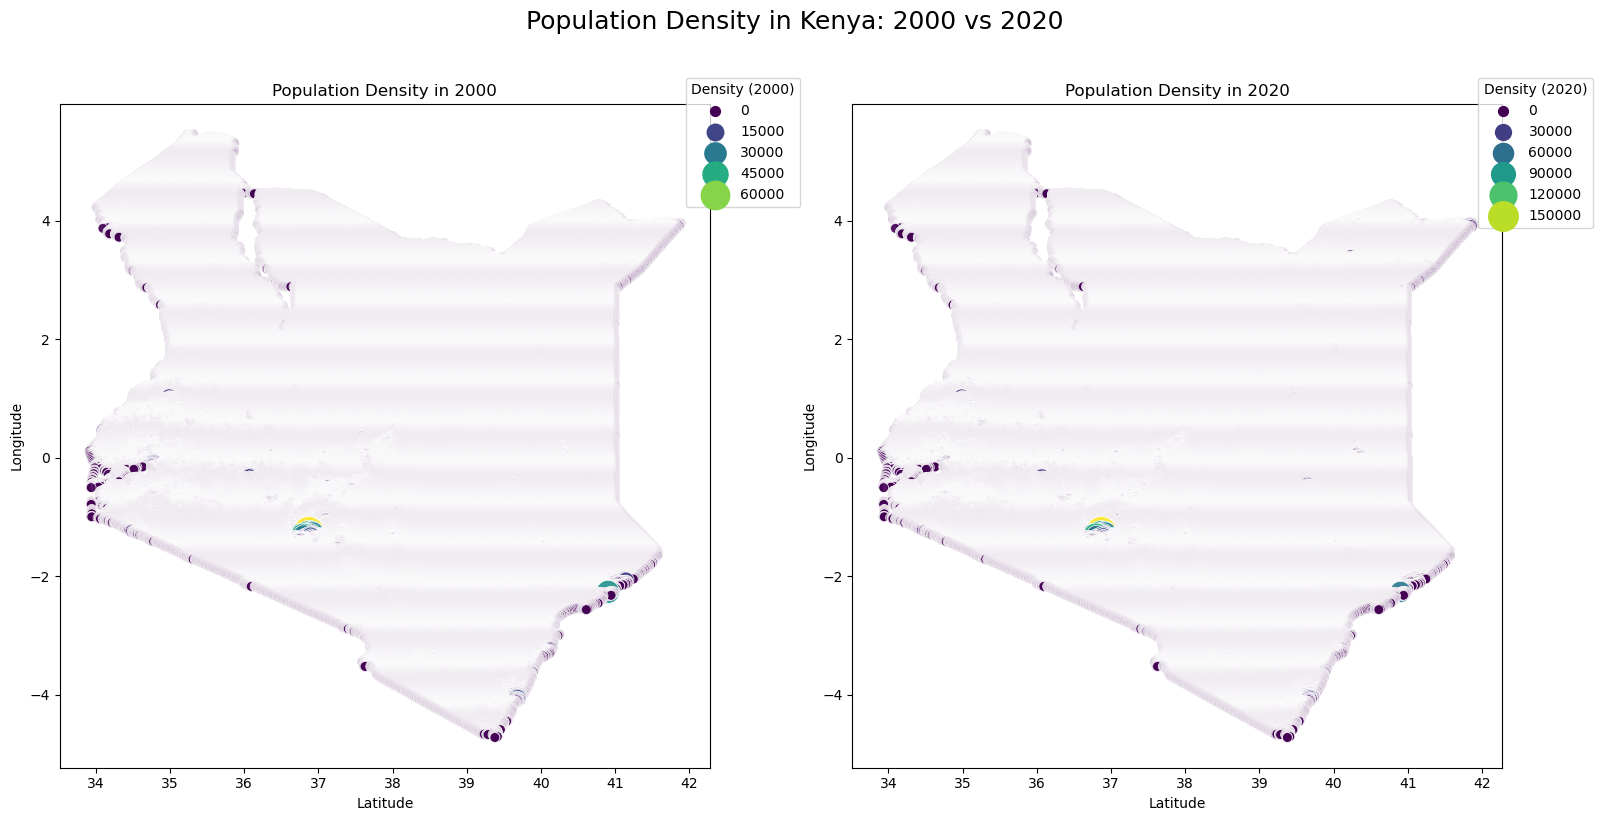

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size and background color for better contrast
plt.figure(figsize=(16, 8), facecolor='white')

# Use a high-contrast color palette
cmap = 'viridis'  # A palette that offers high contrast between colors

# Plot for 2000
plt.subplot(1, 2, 1)
sns.scatterplot(
    data=pop_density_df,
    x='Latitude',
    y='Longitude',
    hue='2000',
    palette=cmap,
    size='2000',
    sizes=(50, 500),  # Further increase size range
    alpha=0.9  # Reduce transparency for better visibility
)
plt.title('Population Density in 2000')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.legend(title='Density (2000)', loc='upper right', bbox_to_anchor=(1.15, 1.05))

# Plot for 2020
plt.subplot(1, 2, 2)
sns.scatterplot(
    data=pop_density_df,
    x='Latitude',
    y='Longitude',
    hue='2020',
    palette=cmap,
    size='2020',
    sizes=(50, 500),
    alpha=0.9
)
plt.title('Population Density in 2020')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.legend(title='Density (2020)', loc='upper right', bbox_to_anchor=(1.15, 1.05))

# Global plot adjustments
plt.suptitle('Population Density in Kenya: 2000 vs 2020', y=1.02, fontsize=18)
plt.tight_layout()
plt.show()


### **Renewable Data**

(a) ***Wind speed***

In [65]:
!pip install rasterio

   ---------------------------------------- 0.0/25.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/25.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/25.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/25.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/25.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/25.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/25.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/25.4 MB 325.1 kB/s eta 0:01:19
   ---------------------------------------- 0.0/25.4 MB 325.1 kB/s eta 0:01:19
   ---------------------------------------- 0.0/25.4 MB 325.1 kB/s eta 0:01:19
   ---------------------------------------- 0.0/25.4 MB 325.1 kB/s eta 0:01:19
   ---------------------------------------- 0.0/25.4 MB 325.1 kB/s eta 0:01:19
   ---------------------------------------- 0.0/25.4 MB 325.1 kB/s eta 0:01:19
   ---------------------------------

In [66]:
import numpy as np
import rasterio
import pandas as pd
from rasterio.transform import rowcol
import geopandas as gpd

wind_speed = r'C:\Users\user\Documents\PHASE_5- Capstone Project\Phase-5-final-project\Energy-Access-and-Electrification-planning-in-Kenya\data\renewable_potential_data\kenya_renewable_data\kenya_wind-speed_100m.tif'

# Read the TIFF file
with rasterio.open(wind_speed) as src:
    wind_data = src.read(1)
    wind_meta_data = src.profile

wind_meta_data

{'driver': 'GTiff', 'dtype': 'float32', 'nodata': nan, 'width': 4149, 'height': 3806, 'count': 1, 'crs': CRS.from_wkt('GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]'), 'transform': Affine(0.002500000000000124, 0.0, 33.906572682195275,
       0.0, -0.002500000000000124, 4.623268747733392), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'deflate', 'interleave': 'band'}

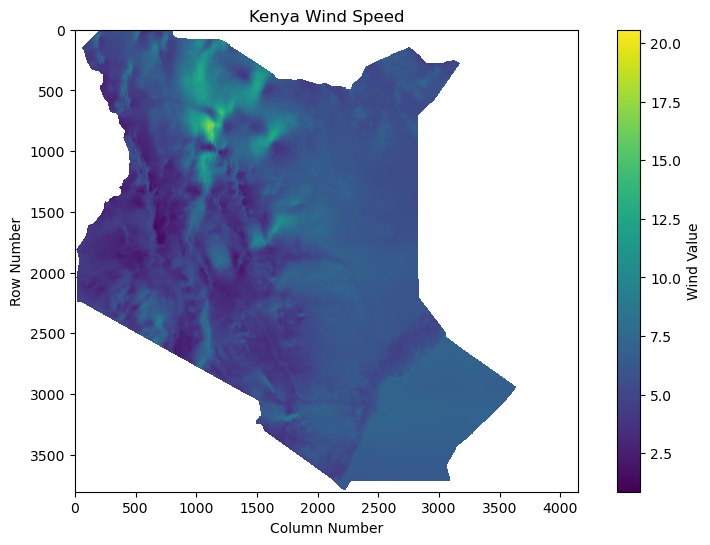

In [67]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.imshow(wind_data, cmap='viridis')
plt.colorbar(label='Wind Value')
plt.title('Kenya Wind Speed')
plt.xlabel('Column Number')
plt.ylabel('Row Number')
plt.show()

In [68]:
# Load the wind TIFF file
wind_speed = r'C:\Users\user\Documents\PHASE_5- Capstone Project\Phase-5-final-project\Energy-Access-and-Electrification-planning-in-Kenya\data\renewable_potential_data\kenya_renewable_data\kenya_wind-speed_100m.tif'

with rasterio.open(wind_speed) as src:
    # Read the wind speed data from the first band
    wind_data = src.read(1)
    transform = src.transform

# List to store latitude, longitude, and wind speed values
data = []

# Loop over each pixel
for row in range(wind_data.shape[0]):
    for col in range(wind_data.shape[1]):
        # Convert row, col to latitude, longitude
        lon, lat = rasterio.transform.xy(transform, row, col)
        wind_speed = wind_data[row, col]

        # Append to data list if wind speed is valid (not a nodata value)
        if not np.isnan(wind_speed):
            data.append({'Latitude': lat, 'Longitude': lon, 'Wind Speed': wind_speed})

wind_speed_df = pd.DataFrame(data)
print(wind_speed_df)

         Latitude  Longitude  Wind Speed
0        4.622019  35.915323    6.276936
1        4.622019  35.917823    6.260634
2        4.622019  35.920323    6.232945
3        4.622019  35.922823    6.241162
4        4.622019  35.925323    6.216225
...           ...        ...         ...
8538058 -4.887981  39.480323    6.142080
8538059 -4.890481  39.472823    6.143734
8538060 -4.890481  39.475323    6.142651
8538061 -4.890481  39.477823    6.141578
8538062 -4.890481  39.480323    6.140533

[8538063 rows x 3 columns]
